In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(warn=-1)

library(reshape)
library(ggplot2)
library(dplyr)


DATA_FILENAME = "result.csv"

d = read.csv(DATA_FILENAME) %>% select(-X)
typology = read.csv("typology3.csv") %>% select(lang, lang_name)
#coefficients = read.csv("coefficients.tsv", sep="\t") %>% inner_join(typology)
gg_color_hues <- function(n) {
   hues = seq(15, 375, length=n+1)
   hcl(h=hues, l=65, c=100)[1:n]
}

hues = gg_color_hues(3)


Attaching package: ‘dplyr’

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Random vs Real by lang, free

some mathjax
$\hat{y_i} = \beta_0 + S_0 + \beta_1 l_s^2 + (\beta_2 + S_2)r_i + \beta_3 r_i l_s^2 + \epsilon_i$


Joining, by = "lang"


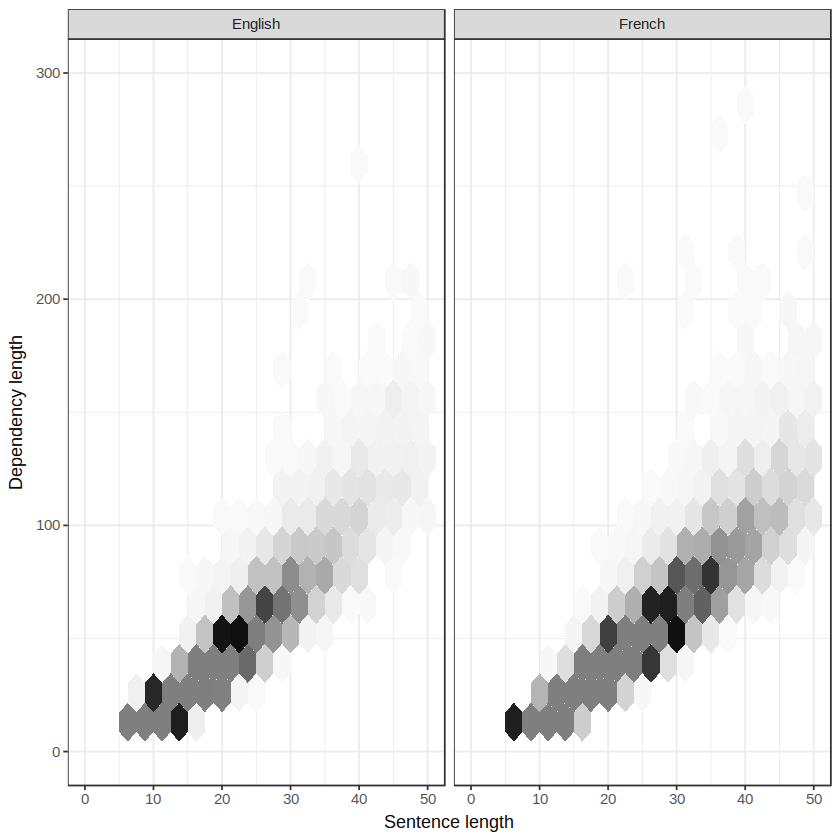

In [3]:
dfree = filter(d, real %in% c('real', 'free random', 'free optimal')) %>% inner_join(typology)
dfree$real = factor(dfree$real, c('free random', 'real', 'free optimal'))

ggplot(dfree, aes(x=length, y=value)) +
    xlim(0, 50) + ylim(0, 300) +
    stat_binhex(bins=20,
                data=filter(dfree, real=="real"),
                mapping=aes(fill=..density..)) +
    scale_fill_continuous(low="gray98", high="black", limits=c(0, 0.02), guide="none") +
    #stat_smooth(method="auto", mapping=aes(colour=real)) +
    scale_colour_manual(name="",
                        labels=c('Free Random Baseline',
                                 'Observed',
                                 'Free Optimal Baseline'),
                        values=c(hues[1], hues[3], hues[2])) +
    xlab("Sentence length") + ylab("Dependency length") +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=290,
    #                      label=paste('rand =',
    #                                  formatC(round(slope+rfree, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=250,
    #                      label=paste('obs =',
    #                                  formatC(round(slope, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=210,
    #                      label=paste('opt =',
    #                                  formatC(round(slope+ofree, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    facet_wrap(~lang_name) +
    theme_bw() +
    theme(legend.position=c(1, 0), legend.justification=c(1, .35))

#ggsave("random_vs_real_bylang_free.pdf", height=7.06, width=8.92, units="in")

## Random vs Real by lang, fixed

Joining, by = "lang"


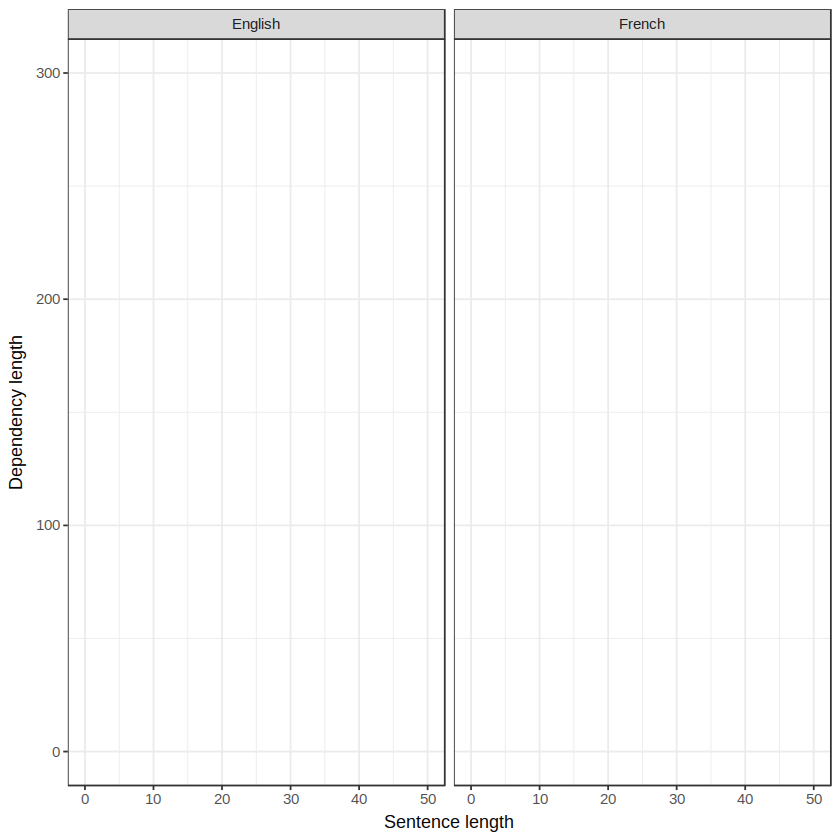

In [4]:
dfixed = d %>% filter(real %in% c('real', 'fixed random')) %>% inner_join(typology)
dfixed$real = factor(dfixed$real, c('fixed random', 'real'))

ggplot(dfixed, aes(x=length, y=value)) +
    xlim(0, 50) + ylim(0, 300) +
    #stat_smooth(method="auto", mapping=aes(colour=real)) +
    scale_colour_manual(name="",
                        labels=c('Fixed Random Baseline',
                            'Observed'),
                        values=c(hues[1], hues[3])) +
    xlab("Sentence length") + ylab("Dependency length") +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=290,
    #                      label=paste('rand =',
    #                                  formatC(round(slope+rfixed, 3),
    #                                    format='f',
    #                                    digits=3)))) +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=250,
    #                      label=paste('obs =',
    #                                  formatC(round(slope, 3),
    #                                    format='f',
    #                                    digits=3)))) +
    facet_wrap(~lang_name) +
    theme_bw() +
    theme(legend.position=c(1, 0), legend.justification=c(1, .25))

#ggsave("random_vs_real_bylang_fixed.pdf", height=7.06, width=8.92, units="in")



Joining, by = "lang"


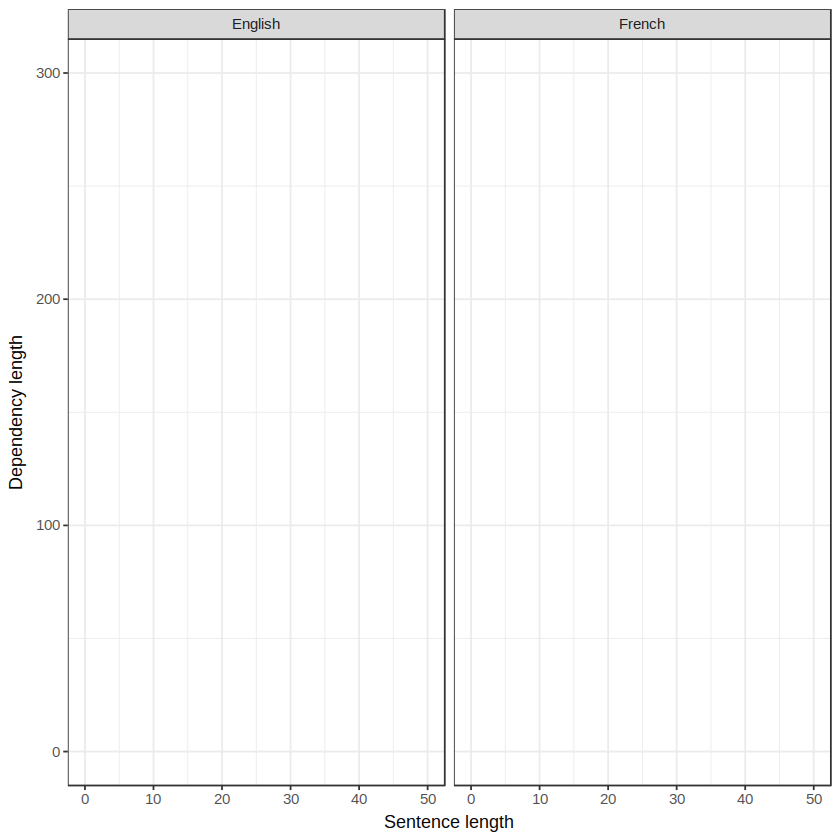

In [9]:
dheadfixed = d %>% filter(real %in% c('real', 'free head-fixed random', 'free head-fixed optimal')) %>% inner_join(typology)
dheadfixed$real = factor(dheadfixed$real, c('free head-fixed random', 'real', 'free head-fixed optimal'))

ggplot(dheadfixed, aes(x=length, y=value)) +
    xlim(0, 50) + ylim(0, 300) +
    #stat_smooth(method="auto", mapping=aes(colour=real)) +
    scale_colour_manual(name="",
                        labels=c('Head-Fixed Free Random Baseline',
                                 'Observed',
                                 'Head-Fixed Free Optimal Baseline'),
                        values=c(hues[1], hues[3], hues[2])) +
    xlab("Sentence length") + ylab("Dependency length") +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=290,
    #                      label=paste('rand =',
    #                                  formatC(round(slope+rheadfixed, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=250,
    #                      label=paste('obs =',
    #                                  formatC(round(slope, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=210,
    #                      label=paste('opt =',
    #                                  formatC(round(slope+oheadfixed, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    facet_wrap(~lang_name) +
    theme_bw() +
    theme(legend.position=c(1, 0), legend.justification=c(1, .4))

#ggsave("random_vs_real_bylang_headfixed.pdf", height=7.06, width=8.92, units="in")



Joining, by = "lang"


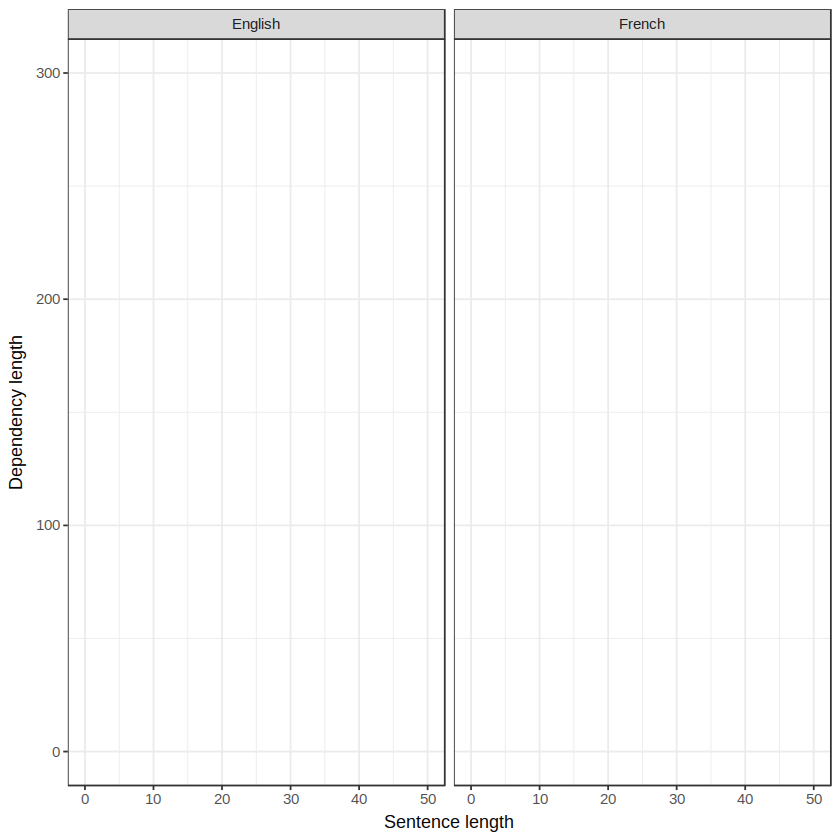

In [10]:
dconsistent = d %>% filter(real %in% c('real', 'free head-consistent random', 'free head-consistent optimal')) %>% inner_join(typology)
dconsistent$real = factor(dconsistent$real, c('free head-consistent random', 'real', 'free head-consistent optimal'))

four_hues = gg_color_hues(4)

ggplot(dconsistent, aes(x=length, y=value)) +
    xlim(0, 50) + ylim(0, 300) +
    #stat_smooth(method="auto", mapping=aes(colour=real)) +
    scale_colour_manual(name="",
                        labels=c('Free Head-Consistent Random Baseline',
                                 'Observed',
                                 'Free Head-Consistent Optimal Baseline'),
                        values=c(hues[1], hues[3], hues[2])) +
    xlab("Sentence length") + ylab("Dependency length") +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=290,
    #                      label=paste('rand =',
    #                                  formatC(round(slope+rheadconsistent, 2),
    #                                  format='f',
    #                                          digits=2)))) +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=250,
    #                      label=paste('obs =',
    #                                  formatC(round(slope, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    #geom_text(size=2,
    #          data=coefficients,
    #          hjust=-.2,
    #          mapping=aes(x=-Inf,
    #                      y=210,
    #                      label=paste('opt =',
    #                                  formatC(round(slope+oheadconsistent, 2),
    #                                  format='f',
    #                                  digits=2)))) +
    facet_wrap(~lang_name) +
    theme_bw() +
    theme(legend.position=c(1, 0), legend.justification=c(1, .25))

#ggsave("random_vs_real_bylang_headconsistent.pdf", height=7.06, width=8.92, units="in")



In [11]:
LENGTH = 12
dm = filter(d, real %in% c('real', 'free random')) %>% inner_join(typology)

dm.by.line <- group_by(dm, length, real, lang_name, start_line) %>% summarise(m=mean(value))
x <- filter(dm.by.line, length==LENGTH)
x <- cast(x, length + lang_name + start_line ~ real)
names(x) <- c('length', 'lang_name', 'start_line', 'RandomBaseline', 'Observed')

t_stat <- function(x, y) {return(t.test(x,y, paired=T)$statistic[1])}
p_value <- function(x, y) {t.test(x, y, paired=T)$p.value}

y <- group_by(x, lang_name) %>% summarise(mx = mean(RandomBaseline), my=mean(Observed))

##Stouffer's method
#get z value for each sentence
#aggregate z values and divide by sqrt(num sentences)
dm.stouffer <- group_by(filter(dm, length==LENGTH, real == 'free random'), lang_name, length, start_line) %>% summarise(fake_sd = sd(value))
x <- inner_join(x, dm.stouffer, by = c('lang_name', 'length', 'start_line'))
x$z <- (x$RandomBaseline - x$Observed)/x$fake_sd
x.stouffer <- group_by(x, lang_name) %>% summarise(stouffer=sum(z)/sqrt(length(z)))
x.stouffer$p_value = (1 - pnorm(x.stouffer$stouffer)) * 2

y$p.less.than = "< .0001"
y[x.stouffer$p_value > .0001 & x.stouffer$p_value < .001, ]$p.less.than = "< .001"
y[x.stouffer$p_value > .001 & x.stouffer$p_value < .01, ]$p.less.than = "< .01"
y[x.stouffer$p_value > .01 & x.stouffer$p_value < .05, ]$p.less.than = "< .05"
y[x.stouffer$p_value > .05, ]$p.less.than = paste("= ", round(x.stouffer[x.stouffer$p_value > .05, ]$p_value, 2), sep="")

y$words = paste("m_rand: ", formatC(round(y$mx, 1), format='f', digits=1), "\nm_obs: ", formatC(round(y$my, 1), format='f', digits=1), "\np", y$p.less.than, sep='')

# Histograms
filter(dm, length == LENGTH) %>% ggplot(aes(x=value)) +
  geom_histogram(aes(x=value, y=..density.., fill=real), alpha=.5, position='identity', binwidth=2) +
  scale_fill_discrete(name="", labels=c("Random Baseline", "Observed")) +
  facet_wrap('lang_name') +
  xlim(LENGTH, 50) +
  ylim(0, .2) +
  theme_bw() + xlab("Dependency length at Sentence Length 12") + ylab("Frequency") +
  theme(legend.position=c(1,0), legend.justification=c(1,.1)) + geom_text(size=3, data=y, aes(x=Inf, y=Inf, label=words), hjust=1.1, vjust=1.1)
#ggsave("random_vs_real_histogram_bylang_free.pdf", width=7, height=7)

Joining, by = "lang"
Using m as value column.  Use the value argument to cast to override this choice


ERROR: Error in `$<-.data.frame`(`*tmp*`, "p.less.than", value = "< .001"): replacement has 1 row, data has 0
